In [1]:
import GMesh
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read target mesh
with netCDF4.Dataset('test_hgrid.nc') as nc:
    G = GMesh.GMesh( lon=nc.variables['x'][::2,::2], lat=nc.variables['y'][::2,::2] )

In [3]:
# Read topo data
with netCDF4.Dataset('test_topo.nc') as nc:
    topo_lon = nc.variables['lon'][:].filled(0.)
    topo_lat = nc.variables['lat'][:].filled(0.)
    topo_depth = nc.variables['elevation'][:,:].filled(0.)

In [4]:
levels = G.refine_loop( topo_lon, topo_lat )

Refine level 0 <GMesh nj:90 ni:180 shape:(90,180)> Hit 27720 out of 4147200 cells (0.2472 Mb)
Refine level 1 <GMesh nj:180 ni:360 shape:(180,360)> Hit 76320 out of 4147200 cells (0.9888 Mb)
Refine level 2 <GMesh nj:360 ni:720 shape:(360,720)> Hit 269280 out of 4147200 cells (3.9551 Mb)
Refine level 3 <GMesh nj:720 ni:1440 shape:(720,1440)> Hit 1045440 out of 4147200 cells (15.8203 Mb)
Refine level 4 <GMesh nj:1440 ni:2880 shape:(1440,2880)> Hit 4147200 out of 4147200 cells (63.2812 Mb)


In [5]:
# Find nearest neighbors for interpolating topography onto fiest grid
ti,tj = levels[-1].find_nn_uniform_source( topo_lon, topo_lat )
fine_topo = topo_depth[tj,ti]

In [6]:
# Use nearest neighbor topography to populate the finest grid
levels[-1].project_source_data_onto_target_mesh( topo_lon, topo_lat, topo_depth )

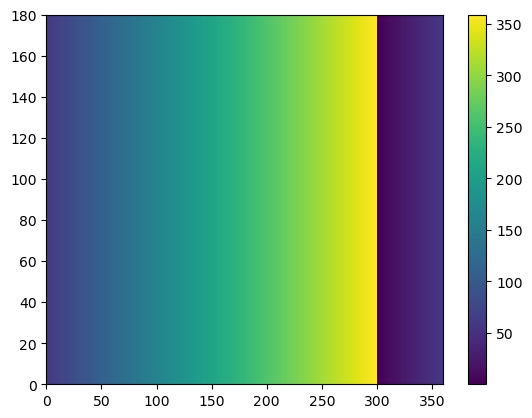

In [7]:
# Quick check (subsampled)
plt.pcolormesh( levels[-1].height[::8,::8] ); plt.colorbar();

In [8]:
# Now recursively coarsen
while len( levels) > 1:
    levels[-1].coarsenby2( levels[-2] )
    del levels[-1]

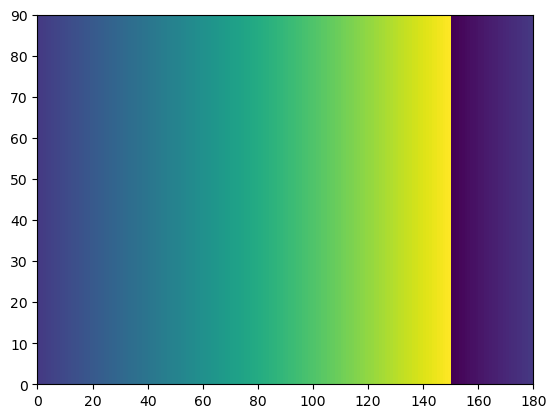

In [9]:
plt.pcolormesh( G.height );

2.0


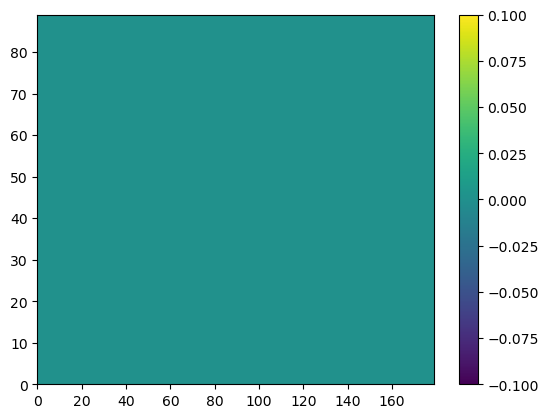

In [10]:
dx = G.lon[0,1] - G.lon[0,0]
print(dx)
plt.pcolormesh( np.mod( G.height - G.lon[:-1,:-1] - 0.5*dx, 360 )[:-1,:-1] ); plt.colorbar();